**Analytical Questions:**

- What’s the overall economic health of Americans - how much liquidity do Americans have?
  - How much are americans getting paid over time (eg., wages increasing and by what percentage)?
  - How much do Americans have to spend after expenses--dispoable income?


In [43]:
# Import necessary libraries
from scipy.stats import pearsonr # for correlation calculation
import pandas as pd # for data manipulation using DataFrames
import numpy as np # for numerical operations 

import seaborn as sns # for data visualization 
import matplotlib.pyplot as plt # for data visualization
import matplotlib.ticker as xticks # for axis formatting
import plotly.express as px # for interactive plots
import math # for mathematical operations not found in numpy or native python...

In [ ]:
# Load datasets
us_econ = pd.read_csv("../data/US_Macro_Micro_Index.csv", parse_dates=['DATE'], index_col=0)
#world_col = pd.read_csv("../data/Cost_of_Living_and_Income_Extended.csv", parse_dates=['Year'])


## Economic Health Univariate Analysis: 
- Question: What’s the overall economic health of Americans - how much liquidity do Americans have?
  - how easily assets (especially money) are available for spending, saving, or investing. For households or consumers?
    - Disposable Income: What's left after taxes.
    - Consumption Levels: How much is being spent.
    - Savings: Money not being spent.

- Income-to-Spending Ratios: Indicate tight or relaxed liquidity.
  - How much are americans getting paid over time. (eg., wages increasing and by what percentage)?

Numerical columns:
- Disposable_Personal_Income_Nominal: Core liquidity measure – money people can actually spend
- Disposable_Personal_Income_Per_Capita: Liquidity per person – great for per-individual analysis
- Real_Personal_Consumption_Expenditures: What people are spending (spending flow)
- Total_Personal_Income Upstream liquidity: are people earning more over time?
Calculated columns: 
  - Spending_Ratio (calculated) = Real_PCE / DPI_Nominal → a ratio over time
  - Liquidity Index (Calucalted) = 

In [5]:
us_econ.describe()

,DATE,YEAR,MONTH,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income
count,219,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,2016-01-31 02:50:57.534246656,2015.630137,6.438356,14772.744749,44706.808219,13050.686301,16795.313699
min,2007-01-01 00:00:00,2007.000000,1.000000,10200.400000,39579.000000,11068.000000,11647.100000
25%,2011-07-16 12:00:00,2011.000000,3.000000,11917.350000,40812.500000,11538.800000,13388.050000
50%,2016-02-01 00:00:00,2016.000000,6.000000,13773.800000,43487.000000,12777.300000,15695.900000
75%,2020-08-16 12:00:00,2020.000000,9.000000,17577.750000,48418.500000,14073.000000,19812.400000
max,2025-03-01 00:00:00,2025.000000,12.000000,22361.700000,61570.000000,16427.300000,25537.800000
std,NaN,5.281542,3.477264,3505.535636,4349.818062,1622.176393,4090.909736


In [6]:
us_econ.head()

,DATE,YEAR,MONTH,MONTH_NAME,QUARTER,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income
0,2007-01-01,2007,1,Jan,Q1,10200.4,39803,11181.0,11647.1
1,2007-02-01,2007,2,Feb,Q1,10265.8,39906,11178.2,11734.2
2,2007-03-01,2007,3,Mar,Q1,10337.0,40007,11190.7,11821.4
3,2007-04-01,2007,4,Apr,Q2,10376.5,40037,11201.5,11868.1
4,2007-05-01,2007,5,May,Q2,10412.7,40029,11218.0,11908.7


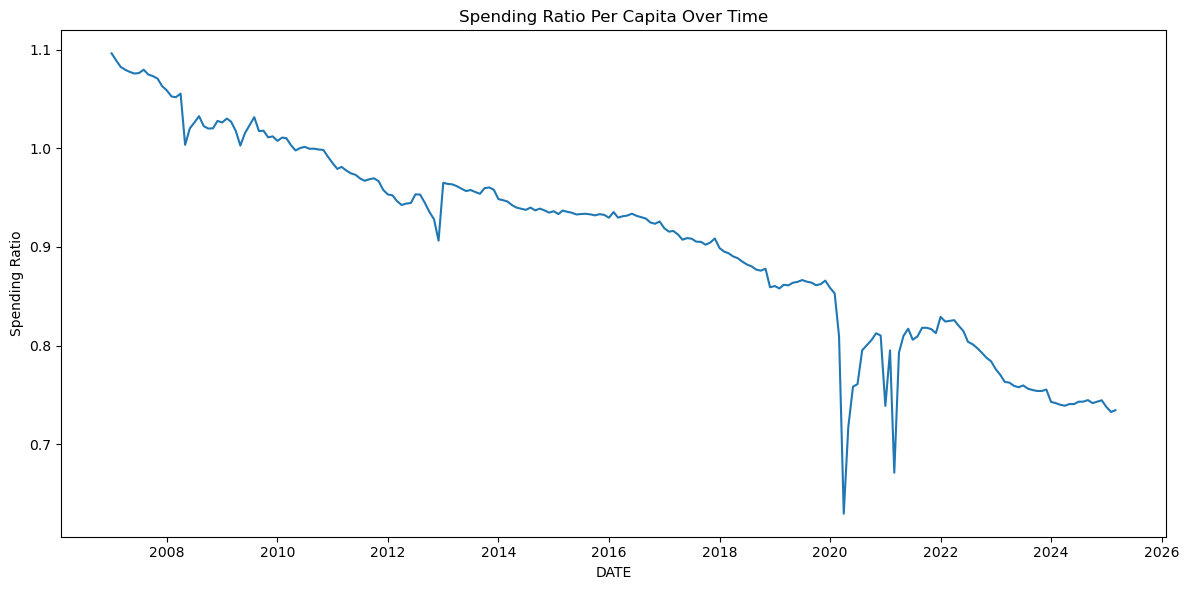

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=us_econ, x='DATE', y='Spending_Ratio')

plt.title('Spending Ratio Per Capita Over Time')
plt.xlabel('DATE')
plt.ylabel('Spending Ratio')
plt.tight_layout()
plt.show()


In [95]:
us_econ['Spending_Ratio_Per_Cap'] = us_econ['Real_Personal_Consumption_Expenditures']  / us_econ['Disposable_Personal_Income_Per_Capita']
us_econ['Spending_Ratio_Per_Cap']

0      0.280908
1      0.280113
2      0.279719
3      0.279779
4      0.280247
         ...   
214    0.315470
215    0.317126
216    0.315524
217    0.314872
218    0.315624
Name: Spending_Ratio_Per_Cap, Length: 219, dtype: float64

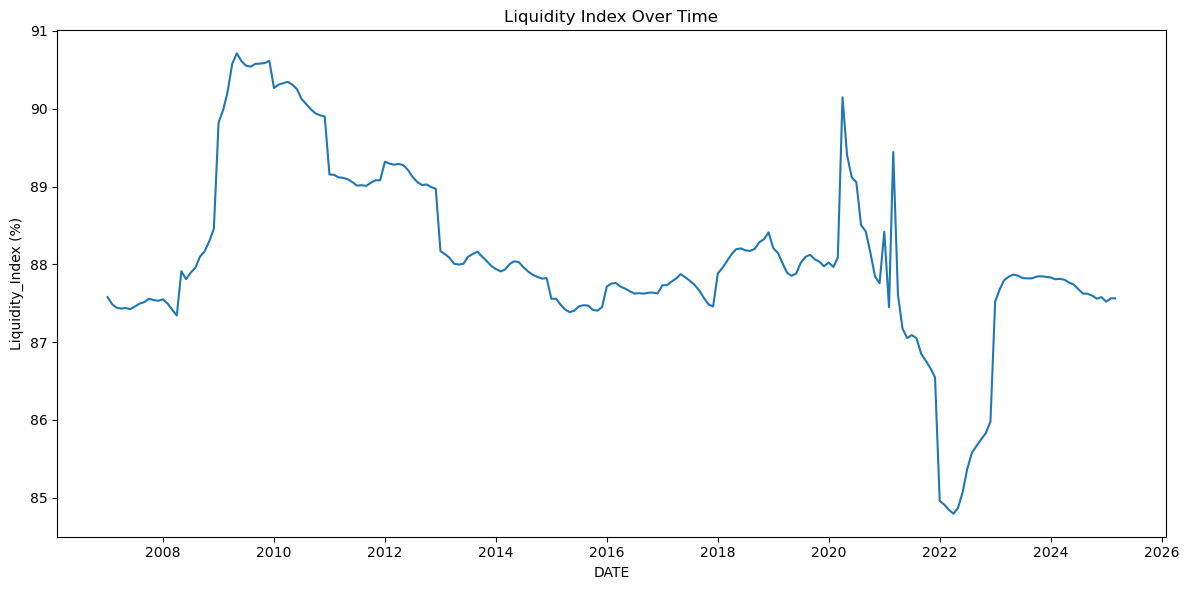

In [ ]:
# Calculated column 'Liquidity Index'.
us_econ['Liquidity_Index'] = (
    us_econ['Disposable_Personal_Income_Nominal'] / us_econ['Total_Personal_Income']
) * 100

plt.figure(figsize=(12,6))
sns.lineplot(data=us_econ, x='DATE', y='Liquidity_Index')
plt.title('Liquidity Index Over Time')
plt.xlabel('DATE')
plt.ylabel('Liquidity_Index (%)')
plt.tight_layout()
plt.show()


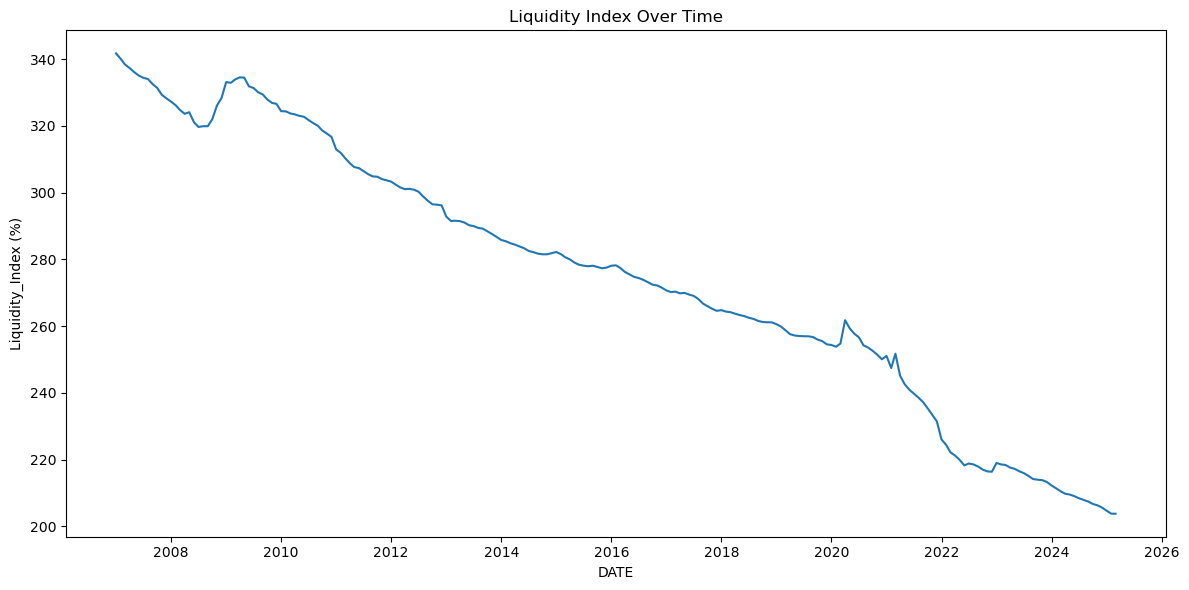

In [ ]:
# Calculated column 'Liquidity Index'.
us_econ['Liquidity_Index'] = (
    us_econ['Disposable_Personal_Income_Per_Capita'] / us_econ['Total_Personal_Income']
) * 100

plt.figure(figsize=(12,6))
sns.lineplot(data=us_econ, x='DATE', y='Liquidity_Index')
plt.title('Liquidity Index Over Time')
plt.xlabel('DATE')
plt.ylabel('Liquidity_Index (%)')
plt.tight_layout()
plt.show()


<Axes: xlabel='Spending_Ratio_Per_Cap', ylabel='Liquidity_Index'>

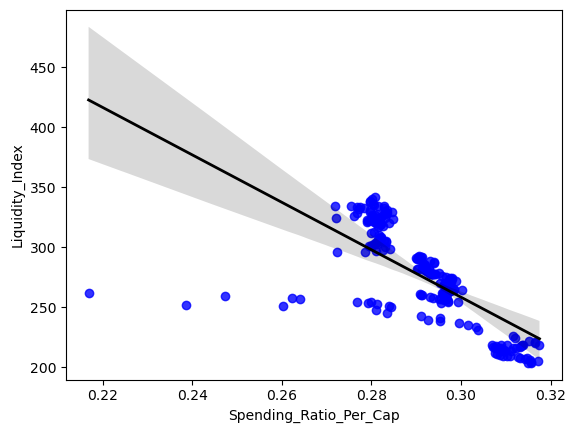

In [ ]:
sns.regplot(data=us_econ, x='Spending_Ratio_Per_Cap', y='Liquidity_Index', scatter_kws={'color': 'blue'}, line_kws={'color': 'black', 'linewidth': 2})


<Axes: xlabel='Liquidity_Index', ylabel='Spending_Ratio_Per_Cap'>

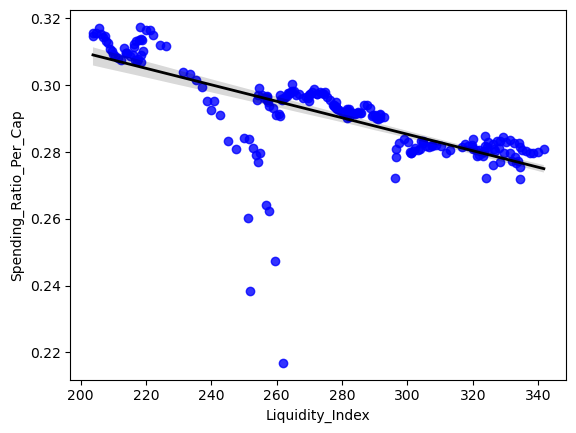

In [97]:
sns.regplot(data=us_econ, x='Liquidity_Index', y='Spending_Ratio_Per_Cap', scatter_kws={'color': 'blue'}, line_kws={'color': 'black', 'linewidth': 2})


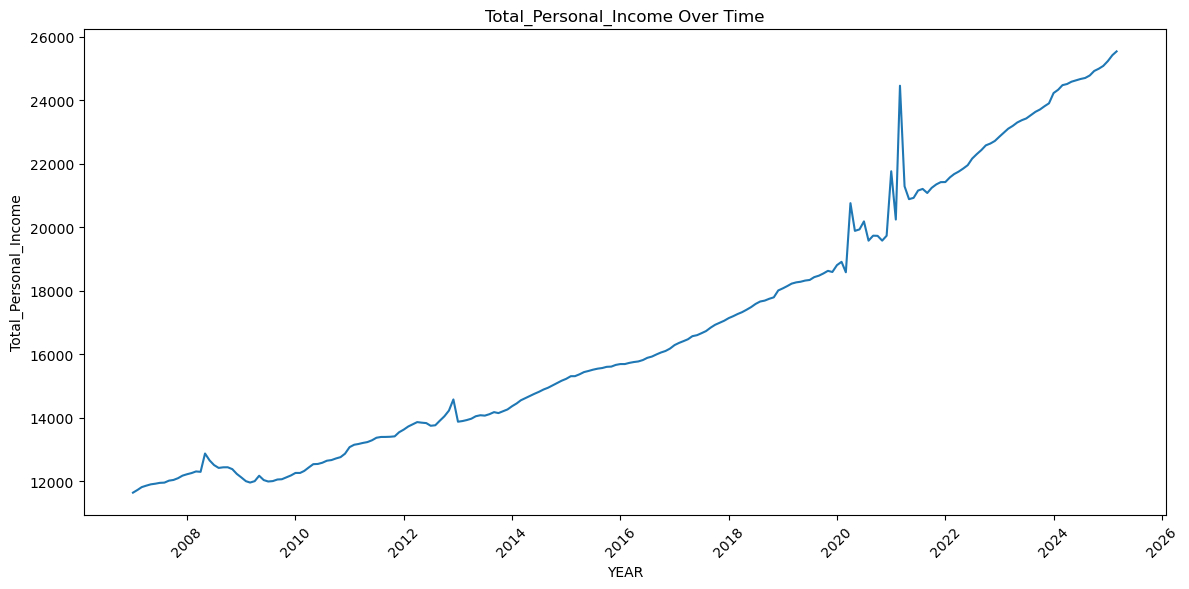

In [64]:
# Line Plot of Personal Income 
plt.figure(figsize=(12,6))
sns.lineplot(data=us_econ,x="DATE", y="Total_Personal_Income", errorbar=None)
plt.title("Total_Personal_Income Over Time")
plt.xlabel("YEAR")
plt.ylabel("Total_Personal_Income")
plt.xticks(rotation=45)
plt.tight_layout()

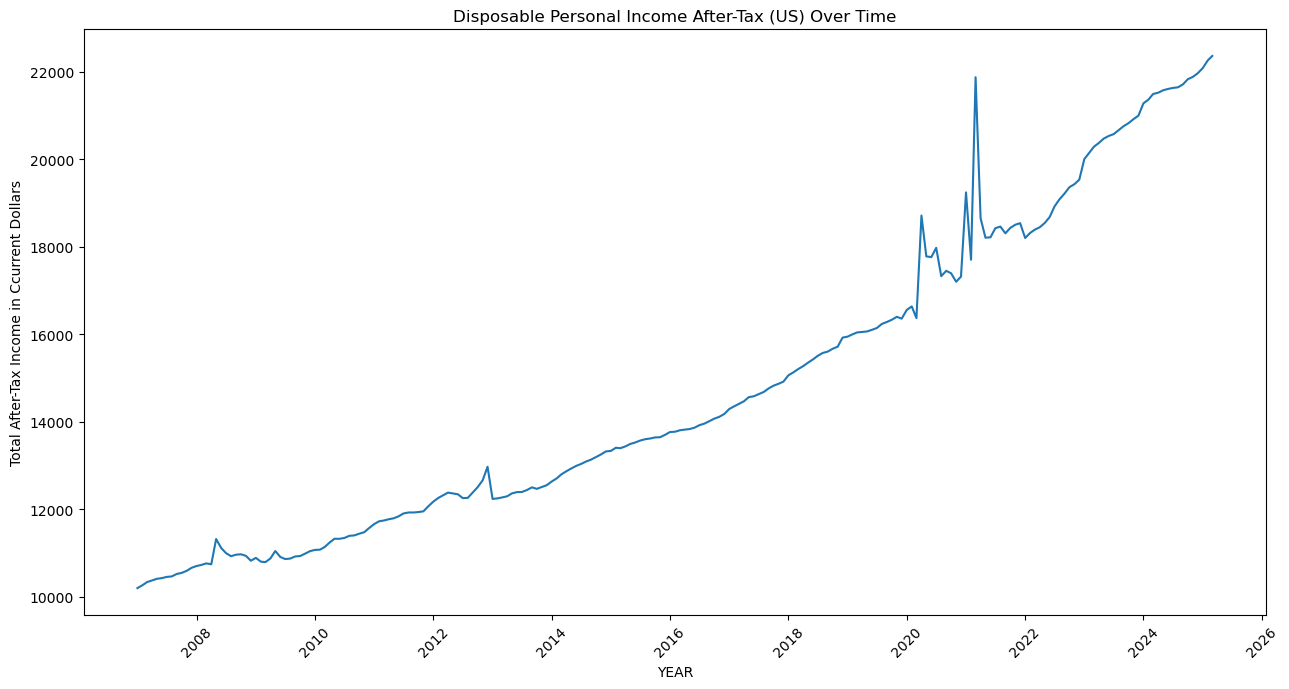

In [8]:
# Line Plot of Disposable Personal Income After Taxes have been wihtdrawn
plt.figure(figsize=(13,7))
sns.lineplot(data=us_econ,x="DATE", y="Disposable_Personal_Income_Nominal", errorbar=None)
plt.title("Disposable Personal Income After-Tax (US) Over Time")
plt.xlabel("YEAR")
plt.ylabel("Total After-Tax Income in Ccurrent Dollars")
plt.xticks(rotation=45)
plt.tight_layout()

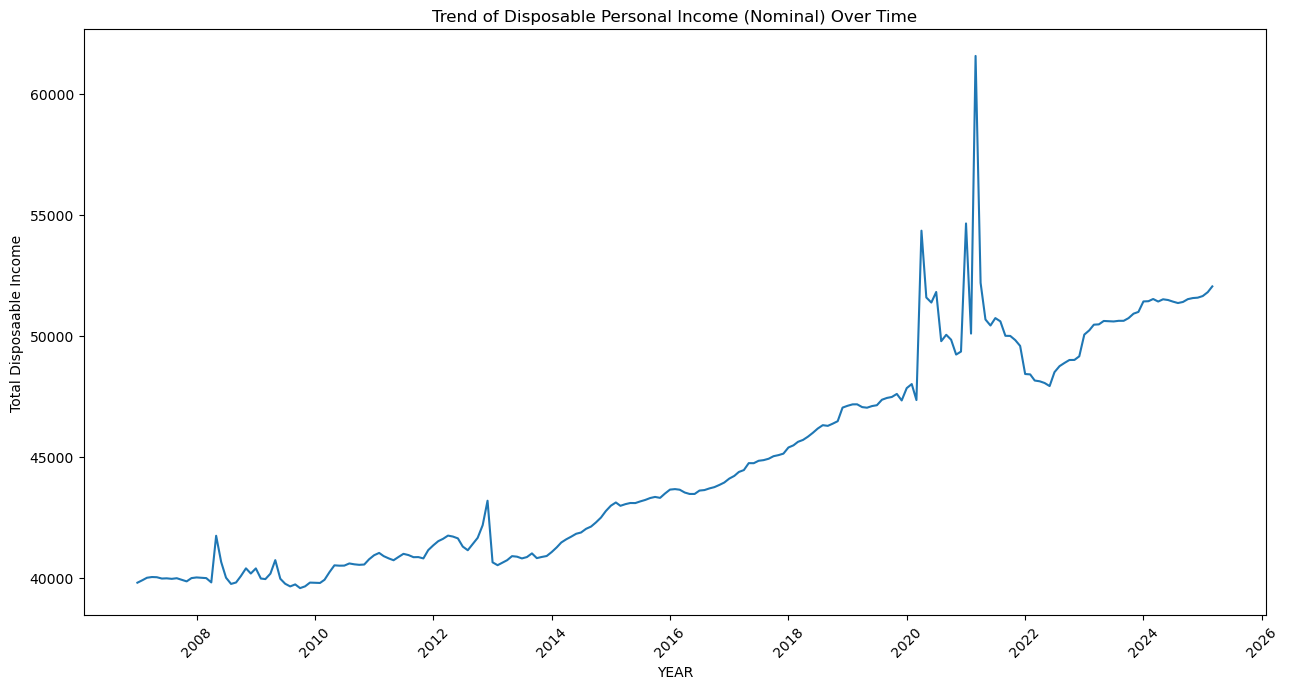

In [9]:
# Line plot of # Line Plot of Disposable Personal Income Per Person
plt.figure(figsize=(13,7))
sns.lineplot(data=us_econ,x="DATE", y="Disposable_Personal_Income_Per_Capita", errorbar=None)
plt.title("Trend of Disposable Personal Income (Nominal) Over Time")
plt.xlabel("YEAR")
plt.ylabel("Total Disposaable Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Split-combine-aggregate: Group and calculate average Disposable Income by Quarter
quarterly_income = us_econ.groupby('QUARTER')['Disposable_Personal_Income_Nominal'].mean().reset_index()


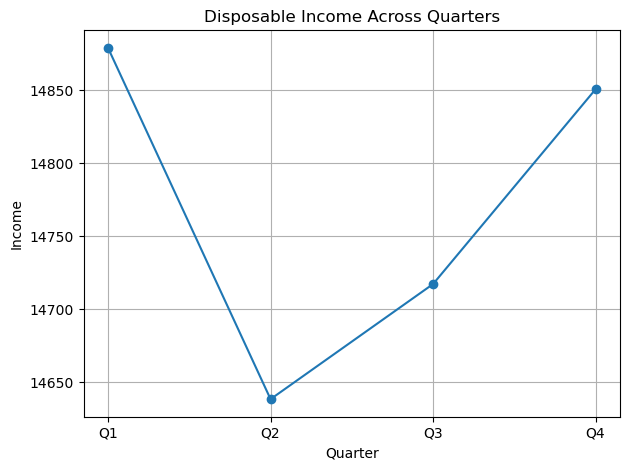

In [61]:

plt.plot(quarterly_income['QUARTER'], quarterly_income['Disposable_Personal_Income_Nominal'], marker='o')
plt.title("Disposable Income Across Quarters")
plt.ylabel("Income")
plt.xlabel("Quarter")
plt.grid(True)
plt.tight_layout()
plt.show()


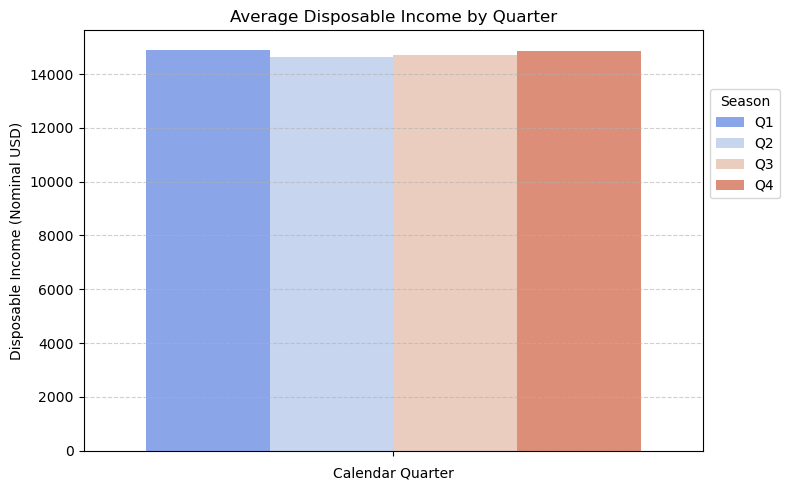

In [ ]:
# Ensure QUARTER exists (if not, create from date)
# us_econ['QUARTER'] = pd.to_datetime(us_econ['DATE']).dt.to_period('Q').astype(str)

# Group by quarter and calculate the average disposable income
quarterly_income = (
    us_econ.groupby('QUARTER')['Disposable_Personal_Income_Nominal']
    .mean()
    .reset_index()
    .sort_values('QUARTER')
)

# Bar Chart Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=quarterly_income,
    hue='QUARTER',
    y='Disposable_Personal_Income_Nominal',
    palette='coolwarm'
)
#Chart Labels
plt.title("Average Disposable Income by Quarter")
plt.ylabel("Disposable Income (Nominal USD)")
plt.xlabel("Calendar Quarter")
plt.xticks(rotation=45)

#Positon Legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.73), title='Season')


plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


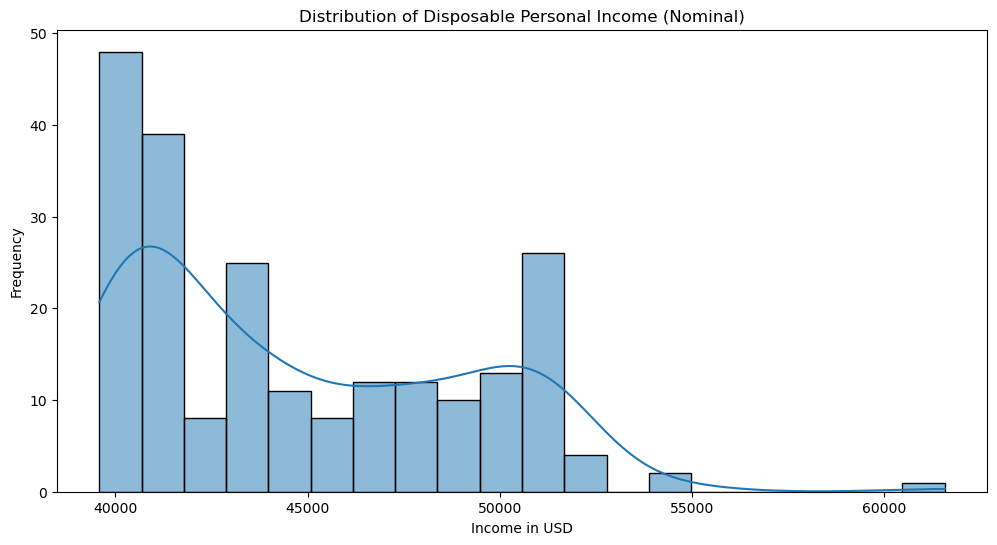

In [35]:
# Distribution of Disposable Personal Income (Nominal) Chart: Histogram or KDE Plot
plt.figure(figsize=(12,6))
sns.histplot(us_econ["Disposable_Personal_Income_Per_Capita"], kde=True, bins=20)
plt.title("Distribution of Disposable Personal Income (Nominal)")
plt.xlabel("Income in USD")
plt.ylabel("Frequency")
plt.show()


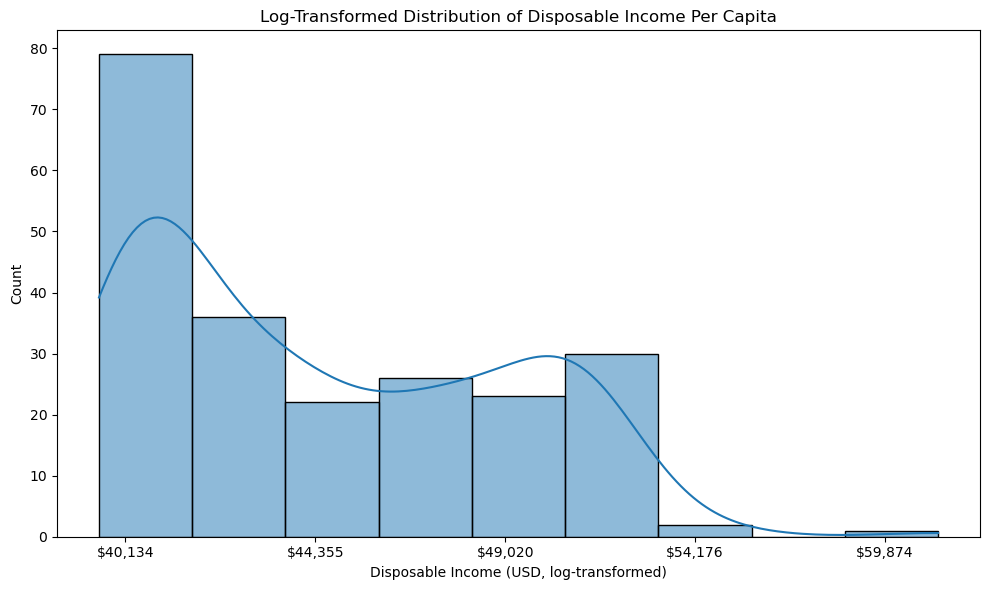

In [63]:
# Tick labels show actual income using Log-Transforms.
plt.figure(figsize=(10,6))
ax = sns.histplot(np.log(us_econ["Disposable_Personal_Income_Per_Capita"]), kde=True)
ax.set_xticks([10.6, 10.7, 10.8, 10.9, 11.0])
ax.set_xticklabels([f"${int(np.exp(tick)):,}" for tick in ax.get_xticks()])
ax.set_xlabel("Disposable Income (USD, log-transformed)")
plt.title("Log-Transformed Distribution of Disposable Income Per Capita")
plt.tight_layout()
plt.show()


**Setps to refine prior Histogram Plot:**
- Log scaling helped normalize extreme outliers revealed in the prior Histogram, subsequently revealing subtle density patterns that would have beeen masked/missed.
- Removed the lowest tick (10.5 ≈ $35,000) to prevent misleading scaling.
- Replaced tick/log labels with real dollar values. 
- Used KDE overlay — helps highlight the density trend: fewer people earn higher disposable incomes.

 **Interpretation for your report/dashboard:**
- This log-transformed distribution of per-person disposable income shows that most Americans fall within the $40,000–$50,000 range. 
- A majority of entries cluster around the lower income tiers, with a noticeable tapering in higher brackets. 
- This confirms the right-skewed tendency of U.S. income, where fewer individuals reach the top/highest levels of disposable earnings.

**Recommendation to Perspective Visitors or Analysts:**
If one is moving to or analyzing the U.S. economy for employment or affordability purpose(s), this chart helps set realistic manage income expectations. While average disposable income per person might look high on paper, the actual distribution is mostly concentrated within the lower-to-mid income ranges.




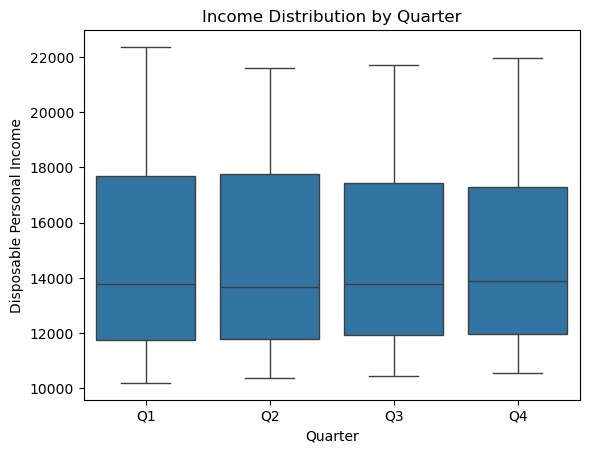

In [13]:
#Box Plot by Quarter (Seasonal View)
sns.boxplot(data=us_econ, x='QUARTER', y='Disposable_Personal_Income_Nominal')
plt.title("Income Distribution by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Disposable Personal Income")
plt.show()


Observations: 
- The median disposable income is fairly consistent across quarters — not much seasonal deviation.
- Q1 and Q2 appear to have a slightly wider spread (more variation), but it's not drastic.
- This can suggest stable earnings throughout the year, or that seasonality in income isn't dramatic in the aggregate.
- Could also hint that major fiscal events--stimulus checks, tax refunds, etc...--don’t drastically shift overall median disposable income by quarter — at least not enough to interrupt the pattern.

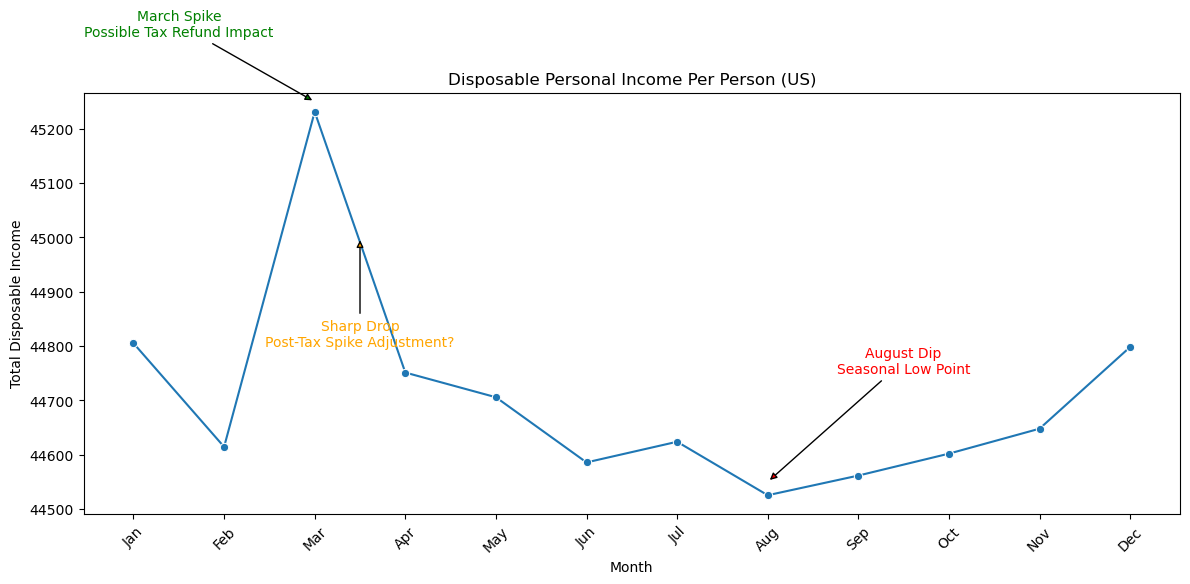

In [ ]:
# Line Plot of Disposable Personal Income Per Person
# Ordered categorical type 
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
us_econ['MONTH_NAME'] = pd.Categorical(us_econ['MONTH_NAME'], categories=months_order, ordered=True)

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=us_econ, x='MONTH_NAME', y='Disposable_Personal_Income_Per_Capita', marker='o', errorbar=None)
plt.title("Disposable Personal Income Per Person (US)")
plt.xlabel("Month")
plt.ylabel("Total Disposable Income")

# Annotate March using numeric index for month positions
plt.annotate(
    'March Spike\nPossible Tax Refund Impact',
    xy=(2, 45250),         # x=2 (March), y= actual value of spike
    xytext=(0.5, 45370),   # Shifted left up
    arrowprops=dict(facecolor='green', arrowstyle='-|>'),
    fontsize=10,
    color='green',
    ha='center'
)

# Annotate the drop from March to April
plt.annotate(
    'Sharp Drop\nPost-Tax Spike Adjustment?',
    xy=(2.5, 45000),           # Midpoint between March-2 and April-3
    xytext=(2.5, 44800),       # Text below the point
    arrowprops=dict(facecolor='orange', arrowstyle='-|>'),
    fontsize=10,
    color='orange',
    ha='center'
)

# Annotate August
plt.annotate(
    'August Dip\nSeasonal Low Point',
    xy=(7, 44550),
    xytext=(8.5, 44750),
    arrowprops=dict(facecolor='red', arrowstyle='-|>'),
    fontsize=10,
    color='red',
    ha='center'
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Interpretation:

- There is a noticeable peak in March, suggesting either:
  - Annual bonuses
  - Tax refunds beginning to arrive
  - Or a seasonal economic policy effect (e.g., stimulus, fiscal payouts in past years)

- Disposable income appears to decline steadily from April through August, bottoming out in August.
  - Could indicate higher expenditures during vacation season (spending increases, saving dips).
  - Employers may offer fewer bonuses during mid-year.
  - Climb back in fall/winter: A gradual increase is seen from September to December.
  - May reflect end-of-year bonuses, improved consumer behavior heading into the holiday season, or catch-up income adjustments.

- Possibly to Policy Makers:
  - Consider strengthening social safety nets during summer months, when real income appears to be at its lowest.
  - Evaluate tax return timing and its impact on early-year income surges.

- Employers/HR Professionals:
  - Income volatility might affect morale — staggered bonuses or mid-year incentives could stabilize spending confidence.

- For Job Seekers or those thinking of Migrantating to the US:
  - March and December may be more favorable financially due to high disposable income.
  - If budgeting for a move to the U.S., expect less buffer room in summer months.
  For Job Seekers or Migrants:

**NOTE:** This seasonal pattern could be compared with monthly consumer sentiment or retail sales data to cross-check behavioral trends.
Suggests that real income modeling should not assume monthly uniformity.

## **Economic Health Bivariate Analysis**

Questions:

- Split-Combine-Aggregate:
  - can try looking at income with regard to political party or administration using year, month, season, etc., using scatter plot.
  - Seasons can also be look at in bivariate analysis to see the relation of income and seasonality..  
  - groupby or cut fiscal Quarters to get deeper insights into income and or liquidity trends overtime, etc...
  - groupby months to get a micro-income perspective over time, etc...
   

In [ ]:
# US Economy EDA:
us_econ.head() 

,DATE,YEAR,MONTH,MONTH_NAME,QUARTER,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income
0,2007-01-01,2007,1,Jan,Q1,10200.4,39803,11181.0,11647.1
1,2007-02-01,2007,2,Feb,Q1,10265.8,39906,11178.2,11734.2
2,2007-03-01,2007,3,Mar,Q1,10337.0,40007,11190.7,11821.4
3,2007-04-01,2007,4,Apr,Q2,10376.5,40037,11201.5,11868.1
4,2007-05-01,2007,5,May,Q2,10412.7,40029,11218.0,11908.7


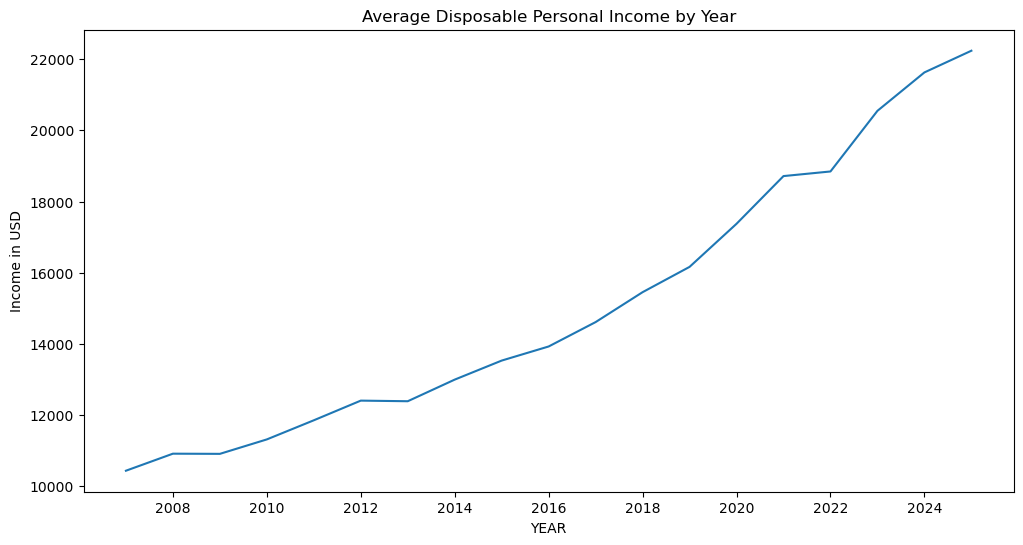

In [44]:
#Income vs. Yearly Trend (Highlighting Growth) Chart: Line Plot with YEAR as x-axis, grouped or averaged
plt.figure(figsize=(12, 6))
income_by_year = us_econ.groupby('YEAR')['Disposable_Personal_Income_Nominal'].mean().reset_index()
sns.lineplot(data=income_by_year, x='YEAR', y='Disposable_Personal_Income_Nominal')
plt.title("Average Disposable Personal Income by Year")
plt.gca().xaxis.set_major_locator(xticks.MultipleLocator(2))
plt.ylabel("Income in USD")
plt.show()


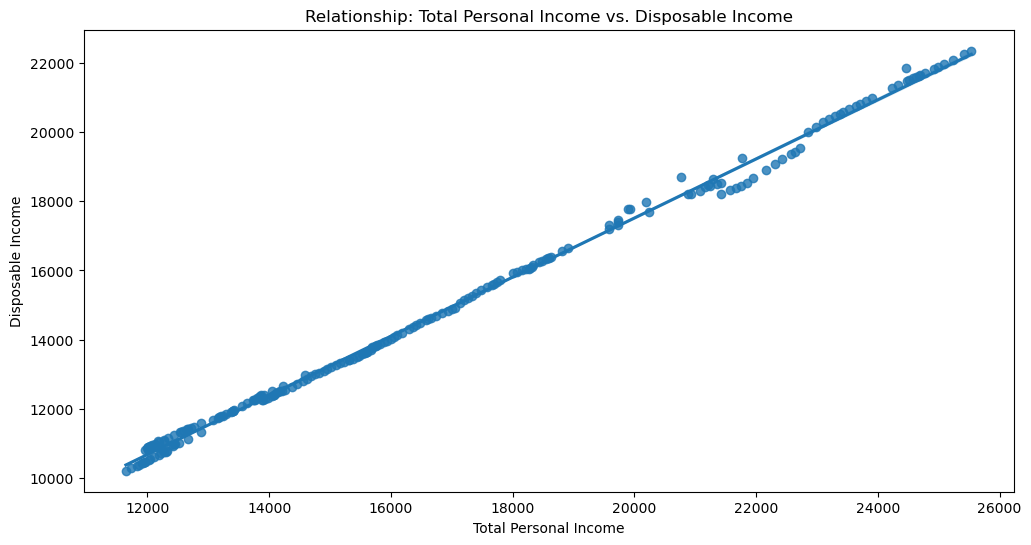

In [45]:
# Personal Income vs Disposable Income 
# Scatter Plot with Regression Line
plt.figure(figsize=(12, 6))
sns.regplot(data=us_econ, x='Total_Personal_Income', y='Disposable_Personal_Income_Nominal')
plt.title("Relationship: Total Personal Income vs. Disposable Income")
plt.xlabel("Total Personal Income")
plt.ylabel("Disposable Income")
plt.show()


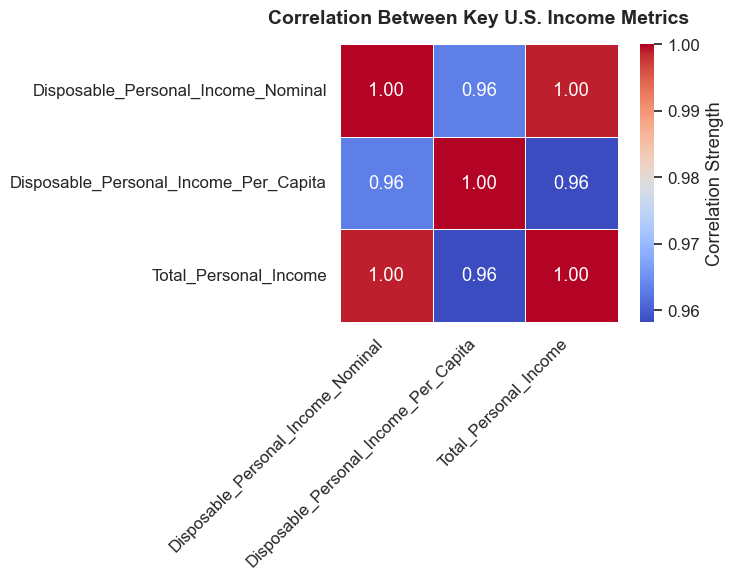

In [ ]:
# Correlation Heatmap (Quick Overview)
# Heatmap of numerical variables

# Select and compute correlation
cols = ['Disposable_Personal_Income_Nominal', 
        'Disposable_Personal_Income_Per_Capita', 
        'Total_Personal_Income']

correlation_matrix = us_econ[cols].corr()

# Set the figure
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.1)

# Heatmap
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            linewidths=0.5, 
            linecolor='white', 
            square=True, 
            cbar_kws={'label': 'Correlation Strength'})

# Title and layout
plt.title("Correlation Between Key U.S. Income Metrics", fontsize=14, weight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



All three metrics — Nominal Disposable Personal Income, Disposable Personal Income Per Capita, and Total Personal Income — are very highly correlated (0.96–1.00).

This indicates they track each other closely over time — which is expected, since they’re all components of the income landscape.

- Nominal DPI includes everyone.

- Per Capita DPI divides that by population.

 Total Personal Income includes a broader base (wages, transfers, dividends, etc.), so a high correlation is realistic.

- The heatmap confirms that there’s internal consistency in the dataset.



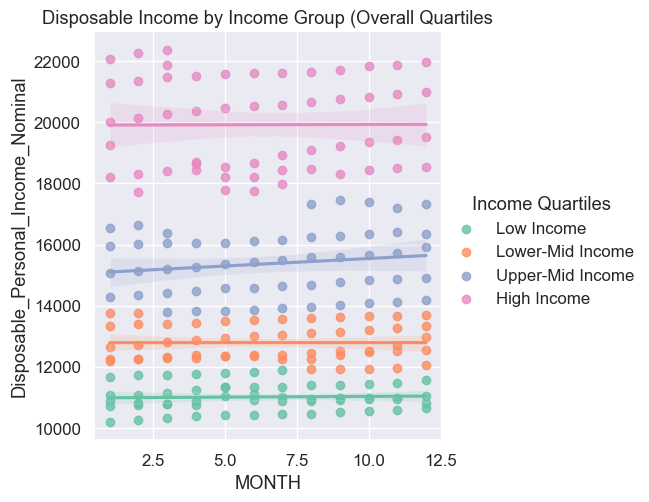

In [ ]:
""" 
Income Quartiles naming scheme for income tiers:

Quartile	    Label 	  	
1st quartile	Low Income		
2nd quartile	Lower-Mid Income	
3rd quartile	Upper-Mid Income	
4th quartile	High Income 

""" 

# Create based quartiles or seasonal groupings
us_econ.loc[:,'Income Quartiles'] = pd.qcut(us_econ['Disposable_Personal_Income_Nominal'], q=4, labels = ['Low Income', 'Lower-Mid Income', 'Upper-Mid Income', 'High Income']
)

#Scatter with hue
#plt.figure(figsize=(10, 6))
sns.lmplot(data=us_econ, x='MONTH', y='Disposable_Personal_Income_Nominal', hue='Income Quartiles', palette='Set2')
plt.title("Disposable Income by Income Group (Overall Quartiles")
plt.show()


**Plot 2: Disposable Personal Income Nominal Per Season:**
**Observation:**
- Fall Q3: Jul–Sep: and Summer Q2: Apr–Jun consistently have higher income values.
- Winter Q1: Jan–Mar: and Spring Q4: Oct–Dec show lower nominal income, though trends are relatively close.

**Insight:**
- Fall and Summer quarters may reflect seasonal income boosts — possibly due to:
- Bonuses, seasonal employment
- Agricultural cycles
- Government disbursements
- If planning a move or evaluating job income, these seasonal variations matter, especially in budgeting or negotiating salary.

**Summary for Decision-Makers (Moving/Job Market Context):**

- Income is Rising: Especially from 2022 onward — a healthy sign for future earnings.
- Seasonal Swings Exist: Higher nominal earnings in summer/fall may impact optimal job start times or moving periods.
- COVID Effects Are Visible: But were followed by consistent rebounds, indicating recovery capacity.

This type of insight is valuable for:

Job seekers

Policy planners

Researchers exploring U.S. economic resilience



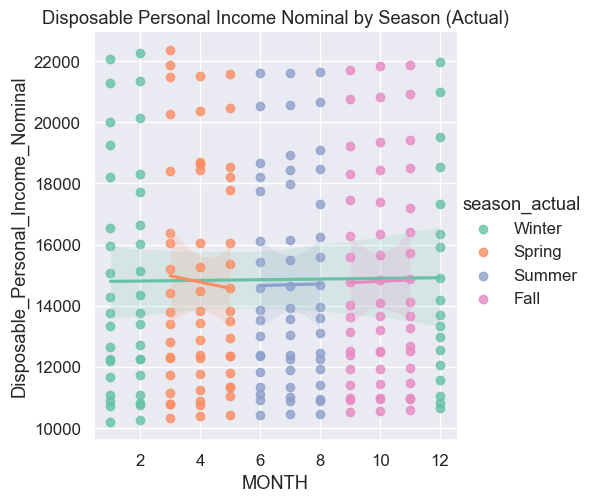

In [ ]:
# creating explicit months of fixed ranges and plotting of disposable personal income by season. 
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

us_econ['season_actual'] = us_econ['MONTH'].apply(assign_season)

sns.lmplot(data=us_econ, x='MONTH', y='Disposable_Personal_Income_Nominal', hue='season_actual', palette='Set2')
plt.title('Disposable Personal Income Nominal by Season (Actual)')
plt.show()


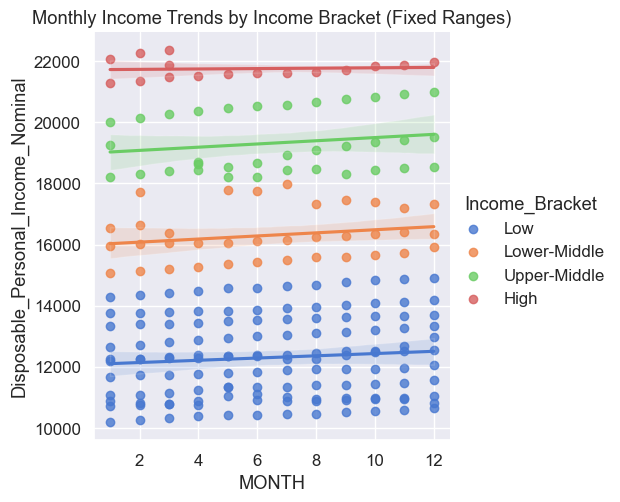

In [ ]:
# Define fixed income ranges
bins = [10000, 15000, 18000, 21000, 24000]
labels = ['Low', 'Lower-Middle', 'Upper-Middle', 'High']

us_econ['Income_Bracket'] = pd.cut(
    us_econ['Disposable_Personal_Income_Nominal'], 
    bins=bins, 
    labels=labels
)

# Plot
sns.lmplot(
    data=us_econ, 
    x='MONTH', 
    y='Disposable_Personal_Income_Nominal', 
    hue='Income_Bracket', 
    palette='muted'
)
plt.title("Monthly Income Trends by Income Bracket (Fixed Ranges)")
plt.show()


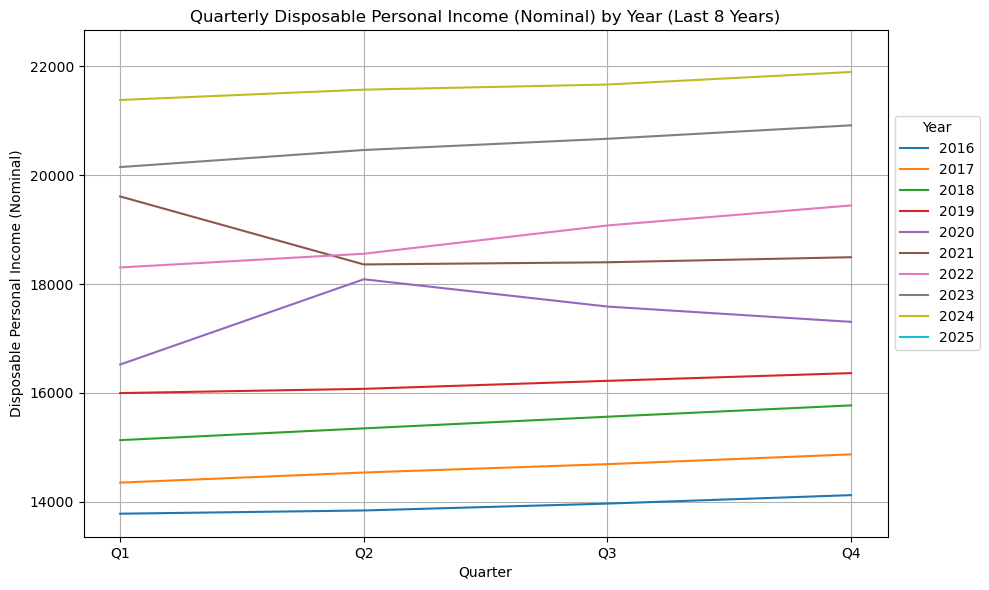

In [56]:
""" 
Insight:

This chart allows us to assess:

Seasonal spending/saving patterns

Year-over-year shifts in income behavior

Disruptions like COVID stimulus or tax delays affecting income in specific quarters



df = pd.read_csv("US_Macro_Micro_Index.csv", parse_dates=["DATE"])
df['YEAR'] = df['DATE'].dt.year
df['QUARTER_LABEL'] = df['DATE'].dt.to_period('Q').astype(str).str[-2:]

"""

recent_years = sorted(us_econ['YEAR'].unique())[-10:]
filtered_df = us_econ[us_econ['YEAR'].isin(recent_years)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='QUARTER', y='Disposable_Personal_Income_Nominal', hue='YEAR',errorbar=None, palette='tab10')
plt.title('Quarterly Disposable Personal Income (Nominal) by Year (Last 8 Years)')
plt.xlabel('Quarter')
plt.ylabel('Disposable Personal Income (Nominal)')

# Move legend to the far right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.6), title='Year')

plt.grid(True)
plt.tight_layout()
plt.show()



 **Observations and Insights:**
- Quarterly Disposable Personal Income (Nominal) by Year
Observation:
  - Income levels are increasing gradually each year from 2016–2025.
  - 2020 and 2021 show noticeable volatility, most likely due to COVID-19 economic disruption and stimulus fluctuations.
  - 2022–2025 show a more stable increase in income across quarters.

**Observations:**
 - This upward trend in income suggests a healthy or better yet resilient U.S. economy over the long term, despite experiencing temporary shocks.
 - If one is considering moving or working in the U.S.,  years indicate a strong post-COVID recovery in take-home pay.

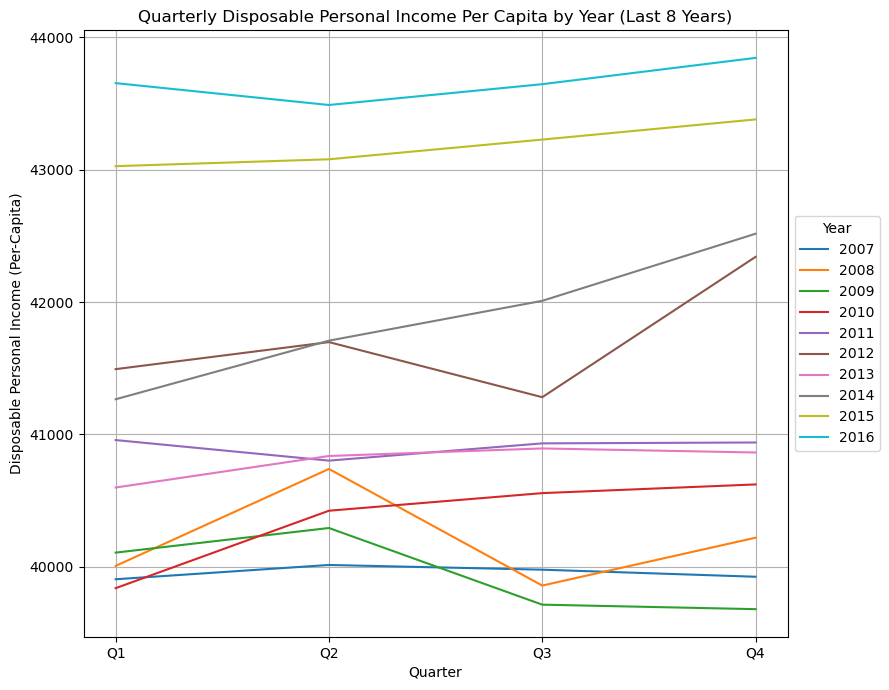

In [60]:
""" 
Insight:

This chart allows us to assess:

Seasonal spending/saving patterns

Year-over-year shifts in income behavior

Disruptions like COVID stimulus or tax delays affecting income in specific quarters



df = pd.read_csv("US_Macro_Micro_Index.csv", parse_dates=["DATE"])
df['YEAR'] = df['DATE'].dt.year
df['QUARTER_LABEL'] = df['DATE'].dt.to_period('Q').astype(str).str[-2:]

"""

recent_years = sorted(us_econ['YEAR'].unique())[:10]
filtered_df = us_econ[us_econ['YEAR'].isin(recent_years)]

plt.figure(figsize=(9, 7))
sns.lineplot(data=filtered_df, x='QUARTER', y='Disposable_Personal_Income_Per_Capita', hue='YEAR', errorbar=None, palette='tab10')
plt.title('Quarterly Disposable Personal Income Per Capita by Year (Last 8 Years)')
plt.xlabel('Quarter')
plt.ylabel('Disposable Personal Income (Per-Capita)')

# Move legend to the far right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Year')

plt.grid(True)
plt.tight_layout()
plt.show()



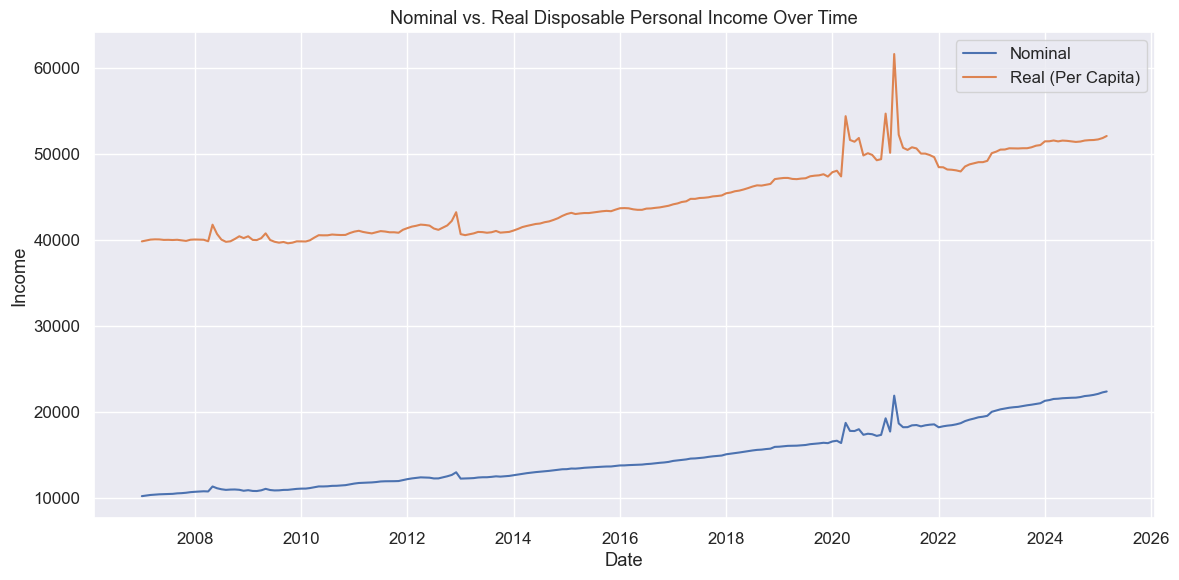

In [ ]:
"""  
Insight:

Nominal income generally trends upward over time.

Real income, adjusted for inflation and population size, fluctuates more — highlighting losses in purchasing power during inflationary periods.

The gap between the two lines helps identify periods where inflation outpaced income growth, affecting Americans’ real economic well-being.

"""

# compares nominal disposable income vs. real (per capita) income over time.
plt.figure(figsize=(12, 6))
sns.lineplot(data=us_econ, x='DATE', y='Disposable_Personal_Income_Nominal', label='Nominal')
sns.lineplot(data=us_econ, x='DATE', y='Disposable_Personal_Income_Per_Capita', label='Real (Per Capita)')
plt.title('Nominal vs. Real Disposable Personal Income Over Time')
plt.xlabel('Date')
plt.ylabel('Income')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Observations and Insights:**
- Two lines over time--**2006–2025**:
  - Nominal Disposable Income--Blue: Actual dollars people received, unadjusted for inflation.
  - Real Disposable Income per Capita--Orange: Inflation-adjusted, showing purchasing power per person/capita.

- Key Observations:
  - Both income metrics rise over time, showing long-term economic growth.
  - Around 2020–2021, there is a sharp spike, especially in real per capita income
    - Most likely by a result of stimulus payments and pandemic-related income support.

- Post-pandemic--2022+, both income lines stabilize, but real income flattens more, likely reflecting inflation related constraints/pressures.
- gap widens in recent years: nominal income increases, but real income remains mostly flat — a signal that rising prices are negatively effecting or eroding purchasing power.

**Suggested Insight for Visitors or Relocators:**
If you're considering moving to the U.S. for work or economic opportunity, this chart provides two key takeaways:
Earnings in dollars are steadily increasing, especially in nominal terms — so you may earn more over time.
However, what you can buy with those dollars (real income) hasn’t increased as quickly in recent years. This suggests:

- Cost of living increases (inflation) are absorbing wage gains.
- You should factor in living costs, healthcare, housing, etc., when evaluating job offers — not just salary alone .
- Periods of support (like 2020-21) may not reflect sustainable income growth — always look at trends before and after crises.

**Bottom Line:** Income growth in the U.S. is real, however recent inflation has limited its impact on personal well-being. Evaluating real income and regional cost of living is crucial for financial planning.

